In [14]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_name = '../../data/fd-export.csv'

## read file
df = pd.read_csv(file_name)
cond_file_name = '../../data/conditions_list.csv'
df_conditions = pd.read_csv(cond_file_name)
"""
    Function to remove abnormal age.
    This is required for reusability purpose.
    
    @Input : dataframe
    @Return : dataframe
"""
def remove_abnormal_age(df):
    df.age = df.age.fillna(-1)
    invalid_ids = set(df[ (df.age<0) | (df.age > 100) ].user_id.values)
    valid_df = df[~df.user_id.isin(invalid_ids)]
    
    print("Valid users with norma age = {}, Percentage {}".format( valid_df.user_id.unique().shape[0]
                                                                  , valid_df.user_id.unique().shape[0]/
                                                               float( df.user_id.unique().shape[0] ) ))
    
    return valid_df

## filter the user
df_processed = remove_abnormal_age(df)

df_processed.head(10)
    

/home/shibin/softwares/anaconda2/envs/nlpproject/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Valid users with norma age = 20456, Percentage 0.9268270581305786


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,31.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
5,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3171,Condition,numbness in right hand,2
6,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,1356,Condition,Headache,2
7,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3172,Condition,pain in left ankle,1
8,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3173,Condition,pain in left leg,1
9,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3174,Condition,pain in joints on feet,2
10,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3175,Condition,neck and upper back pain,2


In [20]:
df_conditions.sort_values(['Count']).tail(10)

,trackable_id,Count,Condition,New Name,Family,Group,Pot. Problem,Comments
68,82,1173,Asthma,Asthma,Immune,Allergy,X,NaN
224,14,1281,Ehlers-Danlos syndrome,Ehlers-Danlos syndrome,Genetic,Fatigue,X,NaN
229,12,1379,Endometriosis,Endometriosis,Reproductive,Pain,X,NaN
436,21,1466,Irritable bowel syndrome,IBS,Immune,Enteric,X,probably immune
365,56,1553,Headaches,Headache,Neural,Pain,NaN,NaN
514,13,2403,Migraine,Migraine,Neural,Pain,NaN,NaN
122,55,3220,Chronic fatigue syndrome,Chronic fatigue syndrome,Physical,Fatigue,NaN,NaN
275,20,3577,Fibromyalgia,Fibromyalgia,Neural,Pain,X,NaN
32,64,4028,Anxiety,Anxiety,Neural,Personality,X,NaN
178,11,4790,Depression,Depression,Neural,Mood,NaN,NaN


# Merge conditions

In [9]:
df_with_conds = pd.merge(df_processed, df_conditions, how ='left', on = 'trackable_id')

In [11]:
df_with_conds_unique = df_with_conds[df_with_conds.trackable_type == 'Condition'].drop_duplicates(['user_id', 'trackable_id'])

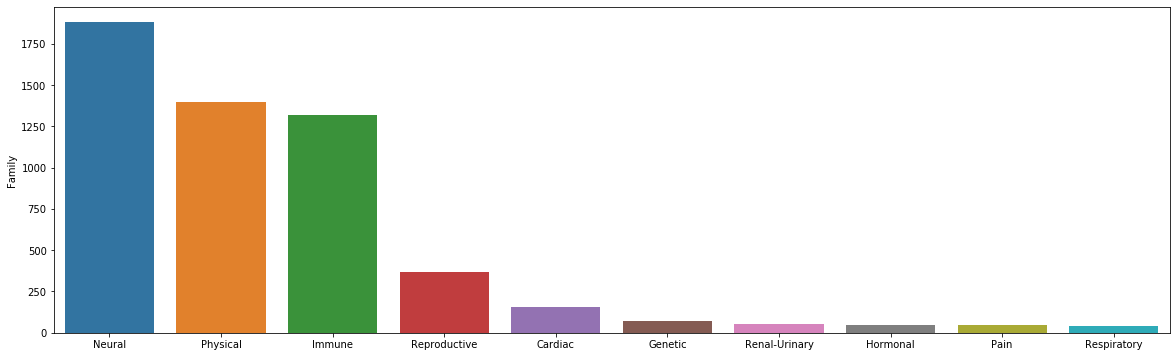

In [21]:
temp_df = df_with_conds_unique['Family'].value_counts().sort_values( ascending = False)[:10]
plt.figure(figsize=(20, 6))
sns_plt = sns.barplot(y = temp_df, x = temp_df.index)